In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [6]:
df = pd.read_csv('hr.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


In [8]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [9]:
df['sales'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [10]:
df['promotion_last_5years'].unique()

array([0, 1], dtype=int64)

In [11]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [12]:
df.mean()

satisfaction_level         0.612834
last_evaluation            0.716102
number_project             3.803054
average_montly_hours     201.050337
time_spend_company         3.498233
Work_accident              0.144610
left                       0.238083
promotion_last_5years      0.021268
dtype: float64

In [13]:
df.mean()['average_montly_hours']/30

6.7016778896370868

In [14]:
print('# of people left={}'.format(df[df['left']==1].size))
print('# of people stayed ={}'.format(df[df['left']==0].size))
print('portion of people who left in 5 years = {}%'. format(int(df[df['left']==1].size/df.size*100)))

# of people left=35710
# of people stayed =114280
portion of people who left in 5 years = 23%


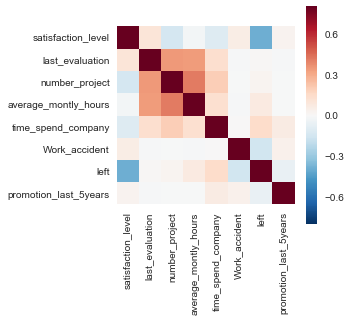

In [15]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(4,4))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

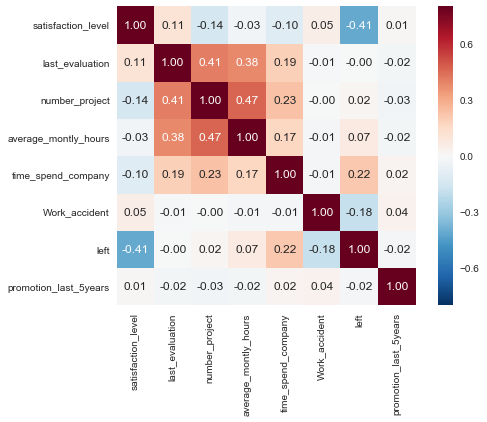

In [16]:
corrmat_low=df[df['salary']=='low'].corr()
corrmat_medium=df[df['salary']=='medium'].corr()
corrmat_high=df[df['salary']=='high'].corr()

sns.heatmap(corrmat_low, vmax=.8, square=True, annot=True, fmt='.2f')

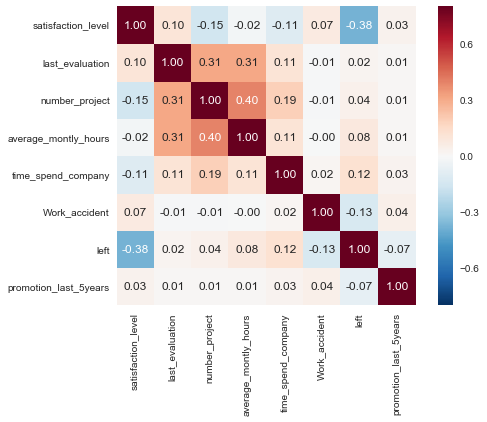

In [17]:
sns.heatmap(corrmat_medium, vmax=.8, square=True, annot=True, fmt='.2f')

In [18]:
df_low=df[df['salary']=='low']
df_medium=df[df['salary']=='medium']
df_high=df[df['salary']=='high']

print('# of low salary employees = ', df_low.shape[0])
print('# of medium slalary employees = ', df_medium.shape[0])
print('# of high salary employees = ', df_high.shape[0])

# of low salary employees =  7316
# of medium slalary employees =  6446
# of high salary employees =  1237


In [19]:
fmt = '{:<22}{:<25}{}'

print(fmt.format('', 'mean', 'std'))
for i, (mean, std) in enumerate(zip(df_low.mean(), df_low.std())):
    print(fmt.format(df_low.columns[i], mean, std))
print('\n')
for i, (mean, std) in enumerate(zip(df_medium.mean(), df_medium.std())):
    print(fmt.format(df_medium.columns[i], mean, std))
print('\n')
for i, (mean, std) in enumerate(zip(df_high.mean(), df_high.std())):
    print(fmt.format(df_high.columns[i], mean, std))
    

                      mean                     std
satisfaction_level    0.6007531437944199       0.254593761941733
last_evaluation       0.717017495899394        0.17326060551822497
number_project        3.799890650628759        1.281822006837944
average_montly_hours  200.9965828321487        50.832214201477065
time_spend_company    3.4382176052487696       1.3038181669165836
Work_accident         0.14215418261344998      0.3492320742806306
left                  0.2968835429196282       0.45691601116040653
promotion_last_5years 0.009021323127392018     0.09455771250585635


satisfaction_level    0.6218166304685063       0.24506911590044703
last_evaluation       0.7173223704622999       0.17104288525984024
number_project        3.8135277691591685       1.2012316138017844
average_montly_hours  201.33834936394663       49.34418794966946
time_spend_company    3.52901023890785         1.5064420799217257
Work_accident         0.14536146447409246      0.35249224780337285
left                

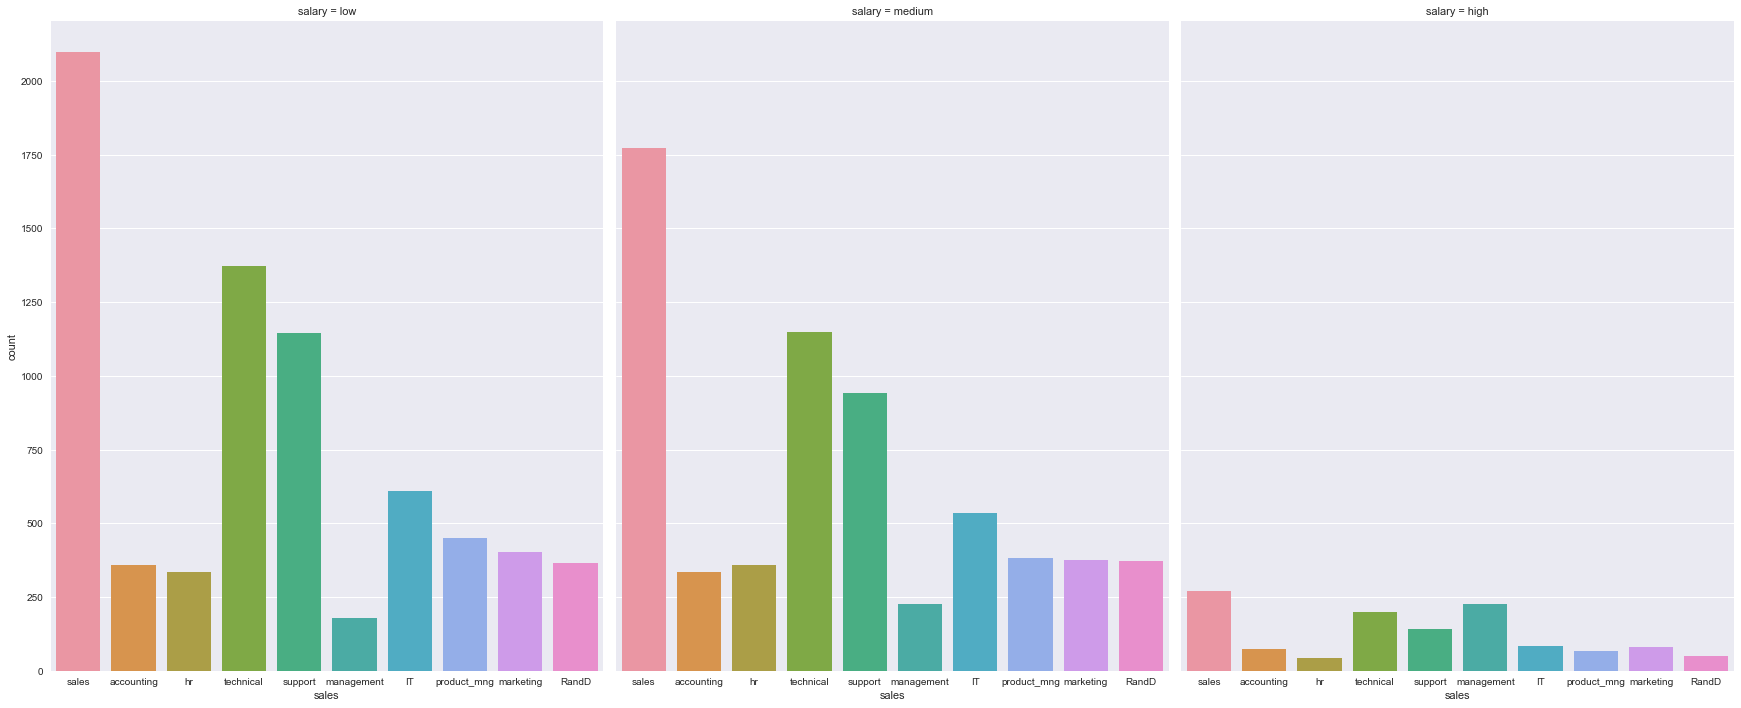

In [20]:
sns.factorplot("sales", col="salary", col_wrap=4, data=df, kind="count",
              size=10, aspect=.8)

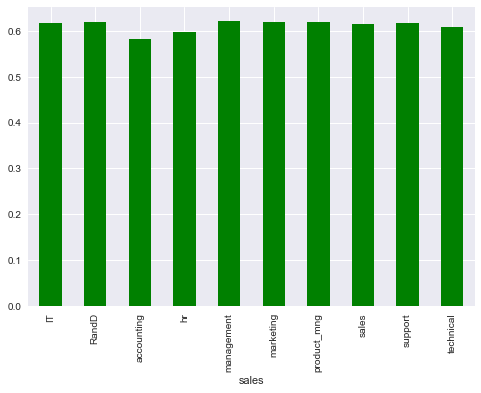

In [21]:
df.groupby('sales').mean()['satisfaction_level'].plot(kind='bar', color='g')

In [22]:
# predict 'left==1' by the other features

from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV 

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn import svm

In [23]:
import xgboost as xgb

ModuleNotFoundError: No module named 'xgboost'

In [24]:
df_copy=pd.get_dummies(df)
df_copy.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_IT,sales_RandD,...,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [26]:
df1 = df_copy
y=df1['left'].values
df1=df1.drop(['left'], axis=1)
X=df1.values

In [27]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.10)

In [29]:
log_reg=LogisticRegression()
log_reg.fit(Xtrain,ytrain)
y_val_l=log_reg.predict_proba(Xtest)
print("Validation accuracy: ", sum(pd.DataFrame(y_val_l).idxmax(axis=1).
                                  values==ytest)/len(ytest))

Validation accuracy:  0.792666666667


In [30]:
sdg = SGDClassifier()
sdg.fit(Xtrain, ytrain)
y_val_l=sdg.predict(Xtest)
print("Validation accuracy: ", sum(y_val_l==ytest)/len(ytest))

Validation accuracy:  0.768666666667


In [31]:
radm=RandomForestClassifier()
radm.fit(Xtrain, ytrain)
y_val_l = radm.predict_proba(Xtest)
print("Validation accuracy: ", sum(pd.DataFrame(y_val_l).idxmax(axis=1).values==ytest)/len(ytest))

Validation accuracy:  0.988666666667


In [33]:
indices = np.argsort(radm.feature_importances_)[::-1]

# Print the feature ranking
print('Feature ranking:')

for f in range(df1.shape[1]):
    print('%d. feature %d %s (%f)' % (f+1 , indices[f], df1.columns[indices[f]],
                                      radm.feature_importances_[indices[f]]))
    

Feature ranking:
1. feature 0 satisfaction_level (0.314762)
2. feature 2 number_project (0.195819)
3. feature 4 time_spend_company (0.175587)
4. feature 3 average_montly_hours (0.155983)
5. feature 1 last_evaluation (0.111863)
6. feature 5 Work_accident (0.008325)
7. feature 18 salary_low (0.007428)
8. feature 19 salary_medium (0.003702)
9. feature 14 sales_sales (0.003399)
10. feature 16 sales_technical (0.003285)
11. feature 15 sales_support (0.003099)
12. feature 17 salary_high (0.002995)
13. feature 6 promotion_last_5years (0.002170)
14. feature 10 sales_hr (0.002078)
15. feature 8 sales_RandD (0.002043)
16. feature 7 sales_IT (0.001900)
17. feature 11 sales_management (0.001585)
18. feature 9 sales_accounting (0.001550)
19. feature 12 sales_marketing (0.001229)
20. feature 13 sales_product_mng (0.001197)


In [34]:
df_copy=df
y=LabelEncoder().fit(df['salary']).transform(df['salary'])
df2 = df_copy.drop(['salary'], axis=1)
X=pd.get_dummies(df2).values

In [35]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

In [36]:
radm=RandomForestClassifier()
radm.fit(Xtrain, ytrain)
y_val_l = radm.predict_proba(Xtest)
print("validation accuracy: ", sum(pd.DataFrame(y_val_l).idxmax(axis=1).values == ytest)/len(ytest))

validation accuracy:  0.621666666667


In [37]:
log_reg=LogisticRegression()
log_reg.fit(Xtrain, ytrain)
y_val_l=log_reg.predict_proba(Xtest)
print("Validation accuracy: ", sum(pd.DataFrame(y_val_l).idxmax(axis=1).values==ytest)/len(ytest))

Validation accuracy:  0.513


In [39]:
df_copy=df
y=LabelEncoder().fit(df['sales']).transform(df['sales'])
df2=df_copy.drop(['sales'], axis=1)
X=pd.get_dummies(df2).values

In [40]:
Xtrain, Xtest, ytrain,ytest=train_test_split(X,y,test_size=0.2)

In [41]:
radm=RandomForestClassifier()
radm.fit(Xtrain, ytrain)
y_val_l=radm.predict_proba(Xtest)
print("Validation accuracy: ", sum(pd.DataFrame(y_val_l).idxmax(axis=1).values==ytest)/len(ytest))

Validation accuracy:  0.419


In [42]:
long_Reg=LogisticRegression()
log_reg.fit(Xtrain,ytrain)
y_val_l=log_reg.predict_proba(Xtest)
print("Validation accuracy: ", sum(pd.DataFrame(y_val_l).idxmax(axis=1).values==ytest)/len(ytest))

Validation accuracy:  0.284


In [43]:
stay=df[df['left']==0]
stay_copy=pd.get_dummies(stay)

In [44]:
df1=stay_copy
y=df1['left'].values
df1=df1.drop(['left'],axis=1)
X=df1.values

In [45]:
pred=clf.predict_proba(X)
# not working since there is no xgoost module in here.

NameError: name 'clf' is not defined

In [46]:
sum(pred[:,1]==1)

NameError: name 'pred' is not defined

In [47]:
stay[stay['sill leave the job']>=0.5]

KeyError: 'sill leave the job'